# RandomWalkTAB

> Defines a two-armed bandit task where both arms follow a random walk.

In [1]:
#| default_exp envs/RandomWalkTab

In [2]:
#| hide
# Imports for the nbdev development environment

from nbdev.showdoc import *
from fastcore.test import *

In [3]:
#| hide

%load_ext autoreload
%autoreload 2

In [4]:
# import for testing
import matplotlib.pyplot as plt

In [5]:
#| export

import numpy as np

In [6]:
#| export

class RandomWalkTAB(object):
    """
    Class for defining a random-walk two-armed bandit.
    """

    def __init__(self, kappa, sigma, rew, pun):
        self.M = 2    # number of arms
        self.kappa = kappa    # decay parameter
        self.sigma = sigma    # standard deviation
        self.rew = rew   # reward value
        self.pun = pun   # punishment value
        self.probs = np.random.uniform(size=2)    # initialize random probs

    def return_payoffs(self, choices):
        """Returns reward with probability p and punishment with probability
        (1-p), then updates the probabilities according to random walk"""
        payoffs = np.ones((len(choices)))
        probs_ar = np.array(self.probs)  # create array of probs
        choices_li = list(choices)  # create list of choices
        probs_now = probs_ar[choices_li]  # returns prob associated
        # with each choice
        rd = np.random.rand(len(choices))  # returns random numbers
        # between 0 and 1
        mask = rd <= probs_now  # if random number is smaller than prob,
        # arm yields reward
        payoffs[mask] = payoffs[mask] * self.rew  # attribute reward
        payoffs[~mask] = payoffs[~mask] * self.pun  # attribute punishment

        # Update probs according to random walk
        self.probs = self.probs + self.kappa * (0.5 - self.probs) + np.random.normal(loc=0., scale=self.sigma**2, size=2)
        
        return payoffs

    def output_probs(self):
        """Outputs np array of probabilities associated to each option."""
        return np.array(self.probs)

## Test

In [7]:
kappa = 0.01 
sigma = 0.05
rew = 1
pun = -1

test = RandomWalkTAB(kappa, sigma, rew, pun)

In [8]:
# Initial random probs
test.output_probs()

array([0.550999  , 0.26893365])

In [9]:
# Store probs over trials
n_trials = 100
probs_rw = np.zeros((2, n_trials))
probs_rw[:, 0] = test.output_probs()

In [10]:
# Run trials with random choice
for t in range(1, n_trials):
    choices = np.random.randint(2, size=1)
    payoffs = test.return_payoffs(choices)
    probs_rw[:, t] = test.output_probs()

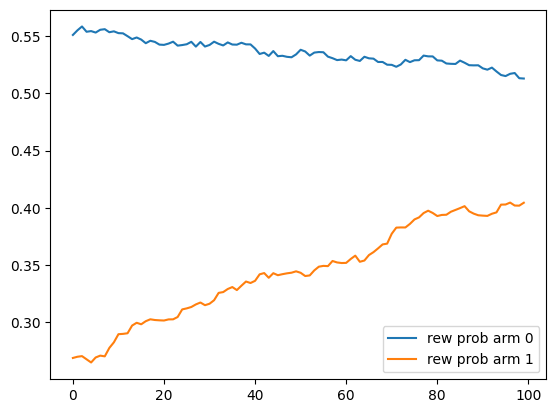

In [11]:
# Plot the random walk

plt.plot(probs_rw[0, :], label="rew prob arm 0")
plt.plot(probs_rw[1, :], label="rew prob arm 1")
plt.legend()

In [13]:
#| hide
import nbdev; nbdev.nbdev_export()